In [408]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.modeling.models import BlackBody
import astropy.constants as const

import sys 
sys.path.append('../../../source_synphot/')
import source_synphot.passband as passband
import source_synphot.io as io
import source_synphot.source
from tools import *

from make_synmags import Spec_mags

In [409]:
passbands = at.Table.read('../../../source_synphot/source_synphot/passbands/pbzptmag.txt',format='ascii')

model_mags = 0.
model = 'AB'
ftess = [x['obsmode'] for x in passbands if x['passband'].startswith("TESS")]
ftess = ftess[0]
ftess = source_synphot.passband.load_pbs(ftess, model_mags, model)
pbnames = ftess.keys()

#pb_swope = source_synphot.passband.load_pbs(['CSP2.g','CSP2.r'], model_mags, model,SVO=True)
pb_ztf = source_synphot.passband.load_pbs(['ZTF.g','ZTF.r'], model_mags, model,SVO=True)
pb_ztfg = source_synphot.passband.load_pbs('ZTF.g', model_mags, model,SVO=True)
pb_ztfr = source_synphot.passband.load_pbs('ZTF.g', model_mags, model,SVO=True)
pb_atlas = source_synphot.passband.load_pbs(['Atlas.orange'], model_mags, model,SVO=True)

SVO
SVO
SVO
SVO
SVO


In [410]:
pb_ztfg

OrderedDict([('ZTF.g',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7fe89cfa3990>,
               -20.80930083967722))])

In [411]:

def RSG_lum(M15,R500,E51,t,shock=True):
    tt = t * u.day
    lum = np.copy(t)
    if shock:
        ts = 14 * M15 **.43 * R500**1.26 * E51**-0.56 * u.hour # hours
    else:
        ts = -1e9 * u.day
    s_ind = tt.to(u.hour).value <= ts.value
    lum[s_ind] = 10**44 * M15**-0.37*R500**2.46 * E51**0.3 * tt.to(u.hour).value[s_ind]**(-4/3)
    
    lum[~s_ind] = 3*10**42 * M15**-0.87*R500 * E51**0.96 * tt.to(u.day).value[~s_ind]**(-0.17)
    
    lum = lum * u.erg / u.s
    
    return lum
    
def RSG_temp(M15,R500,E51,t,shock=True):
    tt = t * u.day
    if shock:
        ts = 14 * M15 **.43 * R500**1.26 * E51**-0.56 * u.hour # hours
    else:
        ts = -1e9 * u.day
    temp = np.zeros_like(t)
    s_ind = (tt.to(u.hour).value <= ts.value)
    
    temp[s_ind] = 10 * M15**-0.22 * R500**0.12*E51**0.23*tt.to(u.hour).value[s_ind]**-0.36
    
    temp[~s_ind] = 3 * M15**-0.13 * R500**0.38*E51**0.11*tt.to(u.day).value[~s_ind]**-0.56
    
    temp = temp * u.eV
    temp = temp / const.k_B.to(u.eV/u.K)
    return temp

def radius(lum,temp):
    sig = const.sigma_sb.to(u.erg/u.s/u.cm**2/u.K**4)
    rad = np.sqrt(lum/(4*np.pi * temp**4 * sig))
    return rad

def Flux(lam, temp, lum, dist):
    rad = radius(lum,temp)
    bb = BlackBody(temperature=temp)
    flux = bb(lam) * np.pi * 4 * u.sr
    dist = dist.to(u.cm)
    flux = flux * (rad / dist)**2
    return flux

In [412]:
time = np.geomspace(0.001,20,1000,)
lum = RSG_lum(1,1,1,time,shock=True)
temp = RSG_temp(1,1,1,time,shock=True)
r = radius(lum,temp)
wav = np.arange(10, 15000) * u.AA
f = Flux(wav,temp[20],lum[20],10*u.pc)

In [414]:
specs = []
for i in range(len(time)):
    f = Flux(wav,temp[i],lum[i],10*u.pc)
    spec = S.ArraySpectrum(wav.value,f.value,waveunits='angstrom', fluxunits='fnu')
    spec.convert('flam')
    specs += [spec]

In [415]:
av = 0.52*3.22
Rv = 3.22
m = Spec_mags(specs,pb_ztf,av=av,Rv=3.22)
t = Spec_mags(specs,ftess)
atlas = Spec_mags(specs,pb_atlas)

<IPython.core.display.Javascript object>


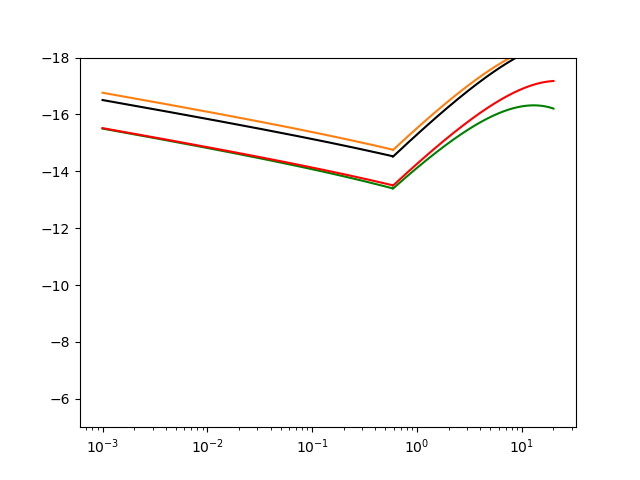

(-5.0, -18.0)

In [418]:
plt.figure()
plt.plot(time,m['ZTF.g'],'g')
plt.plot(time,m['ZTF.r'],'r')
plt.plot(time,t['tess'],'k')
plt.plot(time,atlas['Atlas.orange'],'C1')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.ylim(-5,-18)

In [21]:
test = {}

In [23]:
test['ztfg'] = {'lc':m['ZTF.g'],'pb':pb_atlas}

In [24]:
test

{'ztfg': {'lc': array([20.00910356, 20.01213397, 20.01516549, 20.01819813, 20.02123189,
         20.02426678, 20.02730279, 20.03033994, 20.03337822, 20.03641765,
         20.03945822, 20.04249995, 20.04554283, 20.04858686, 20.05163207,
         20.05467844, 20.05772598, 20.0607747 , 20.06382459, 20.06687568,
         20.06992795, 20.07298142, 20.07603609, 20.07909196, 20.08214904,
         20.08520733, 20.08826684, 20.09132757, 20.09438953, 20.09745272,
         20.10051714, 20.1035828 , 20.10664971, 20.10971787, 20.11278728,
         20.11585795, 20.11892989, 20.12200309, 20.12507756, 20.12815332,
         20.13123036, 20.13430868, 20.1373883 , 20.14046921, 20.14355143,
         20.14663495, 20.14971978, 20.15280594, 20.15589341, 20.15898221,
         20.16207235, 20.16516382, 20.16825663, 20.17135079, 20.1744463 ,
         20.17754317, 20.1806414 , 20.183741  , 20.18684197, 20.18994432,
         20.19304806, 20.19615318, 20.19925969, 20.20236761, 20.20547693,
         20.20858765, 20

In [52]:
def mag2flux(mag,magerr=None,zp=-48.6):
    flux = 10**(-2/5*(mag-zp))
    if magerr is not None:
        fluxerr = magerr /(2.5 / np.log(10)) * flux
        return flux, fluxerr
    else:
        return flux
        

def Nakar_model(M15,R500,E51,time,dist,shock=True):
    lum = RSG_lum(M15,R500,E51,time,shock=shock)
    temp = RSG_temp(M15,R500,E51,time,shock=shock)
    r = radius(lum,temp)
    wav = np.arange(10, 15000) * u.AA
    
    specs = []
    for i in range(len(time)):
        f = Flux(wav,temp[i],lum[i],dist*u.pc)
        spec = S.ArraySpectrum(wav.value,f.value,waveunits='angstrom', fluxunits='fnu')
        spec.convert('flam')
        specs += [spec]
    return specs

In [198]:
def Nakar_lc(var,data,dist,av=0,Rv=3.22,shock=True):
    M15 = var[0]
    R500 = var[1]
    E51 = var[2]
    t0 = var[3]
    res = {}
    keys = list(data.keys())
    for key in keys:
        time = data[key]['lc']['time'] - t0
        ob_mag = data[key]['lc']['mag']
        ob_magerr = data[key]['lc']['mag_err']
        specs = Nakar_model(M15,R500,E51,time,dist,shock=shock)
        
        mod_mag = Spec_mags(specs,data[key]['pb'],av=av,Rv=Rv)
        mod_mag = mod_mag[list(mod_mag.keys())[0]]    
        res[key] = {}
        res[key]['time'] = data[key]['lc']['time']
        res[key]['mag'] = mod_mag
    return res

def fit_Nakar(var,data,dist,av=0,Rv=3.22,shock=True):
    M15 = var[0]
    R500 = var[1]
    E51 = var[2]
    t0 = var[3]
    res = {}
    keys = list(data.keys())
    for key in keys:
        time = data[key]['lc']['time'] - t0
        ob_mag = data[key]['lc']['mag']
        ob_magerr = data[key]['lc']['mag_err']
        specs = Nakar_model(M15,R500,E51,time,dist,shock=shock)
        
        mod_mag = Spec_mags(specs,data[key]['pb'],av=av,Rv=Rv)
        mod_mag = mod_mag[list(mod_mag.keys())[0]]    
        ob_flux, ob_flux_err = mag2flux(ob_mag,ob_magerr)
        mod_flux = mag2flux(mod_mag)
        res[key] = {}
        res[key]['time'] = time
        res[key]['flux'] = ob_flux - mod_flux
        res[key]['flux_err'] = ob_flux_err
    return res

In [390]:
def chi2(var,data,dist,av,Rv,shock=True):
    res = fit_Nakar(var,data,dist,av=av,Rv=Rv,shock=True)
    residual = 0
    degrees = 0
    for key in list(res.keys()):
        residual += np.nansum(res[key]['flux']**2/res[key]['flux_err']**2)
        degrees += len(res[key]['flux'])
    return -(residual / degrees) 

def flat_prior(var):
    M15 = var[0]
    R500 = var[1]
    E51 = var[2]
    t0 = var[3]
    if 8/15 < M15 < 20/15 and 1/500 < R500 < 4 and 0.001 < E51 < 10 and 58937 < t0 < 58940:
        return 0.0
    return -np.inf

def probability(var, data,dist, av=0.52*3.22, Rv=3.22, shock=True):
    lp = flat_prior(var)
    if not np.isfinite(lp):
        return -np.inf
    return lp + chi2(var,data,dist,av=av,Rv=Rv,shock=shock)

In [123]:
import tessreduce as tr

In [379]:
tess = np.loadtxt('20fqv_difflc.txt').T
tess = tess[:,np.isfinite(tess[1,:])]
flu, tim  = tr.bin_data(tess[1],tess[0],12)
flu_e, tim  = tr.bin_data(tess[2],tess[0],12)

gd = pd.read_csv('2020fqv_yse.csv')
ztf_g = gd.iloc[gd['FLT'].values=='g-ZTF']
ztf_r = gd.iloc[gd['FLT'].values=='r-ZTF']
atlas = np.loadtxt('ATLAS_o_day_average.txt')


data = {}
mag_err = (2.5 / np.log(10)) * (flu_e / flu)
ind = (tim > 58935) & (tim < 58954)
data['tess'] = {'lc':{'time':tim[ind],'mag':-2.5*np.log10(flu[ind]) + 20.81,'mag_err':mag_err[ind]},'pb':ftess}
ind = (ztf_g.MJD.values < 58954)
data['ztf_g'] =  {'lc':{'time':ztf_g.MJD.values[ind],'mag':ztf_g.MAG.values[ind],'mag_err':ztf_g.MAGERR.values[ind]},'pb':pb_ztfg}
ind = ztf_r.MJD.values < 58954
data['ztf_r'] =  {'lc':{'time':ztf_r.MJD.values[ind],'mag':ztf_r.MAG.values[ind],'mag_err':ztf_r.MAGERR.values[ind]},'pb':pb_ztfr}
ind = (atlas[0] < 58954) & (atlas[0] > 58935)
data['atlas_o'] =  {'lc':{'time':atlas[0,ind],'mag':atlas[1,ind],'mag_err':atlas[2,ind]},'pb':pb_atlas}

In [231]:
var = [(17.9-2)/15,(980)/500,0.35/3,58939-.5]
#var = [(16.5)/15,(980)/500,5.8e50/1e51,58939-.5]
var = [1,1,1,58938]

In [172]:
eh = Nakar_lc(var,data,17.3e6,shock=False,av=av,Rv=Rv)

<IPython.core.display.Javascript object>


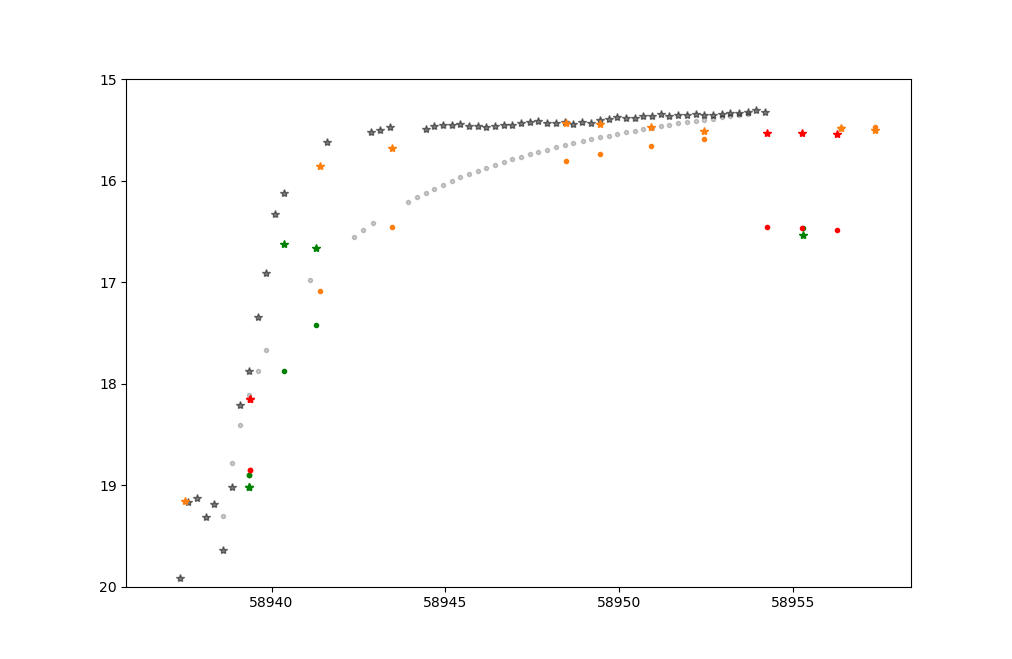

(20.0, 15.0)

In [174]:
plt.figure()
plt.plot(eh['tess']['time']-.5,eh['tess']['mag'],'k.',alpha=0.2)
plt.plot(eh['ztf_g']['time'],eh['ztf_g']['mag'],'g.')
plt.plot(eh['ztf_r']['time'],eh['ztf_r']['mag'],'r.')
plt.plot(data['tess']['lc']['time'],data['tess']['lc']['mag'],'k*',alpha=0.5)
plt.plot(data['ztf_g']['lc']['time'],data['ztf_g']['lc']['mag'],'g*')
plt.plot(data['ztf_r']['lc']['time'],data['ztf_r']['lc']['mag'],'r*')

plt.plot(eh['atlas_o']['time'],eh['atlas_o']['mag'],'C1.')
plt.plot(data['atlas_o']['lc']['time'],data['atlas_o']['lc']['mag'],'C1*')
plt.gca().invert_yaxis()
plt.ylim(20,15)

In [33]:
eh = fit_Nakar(var,data,17.3e6)

In [28]:
from scipy.optimize import minimize

In [32]:
dist = 17.3e6
minimize(chi2,var,args=(data,dist,av,Rv))

5076.588826573971
5076.588672400017
5076.589035541351
5076.588992756271


KeyboardInterrupt: 

In [27]:
chi2(var,data,17.3e6)

5076.588826573971

In [81]:
key = 'tess'
time = data[key]['lc']['time'] - var[-1]
ob_mag = data[key]['lc']['mag']
ob_magerr = data[key]['lc']['mag_err']
mod = Nakar_model(1,1,1,time,shock=True)

mod_mag = Spec_mags(mod,data[key]['pb'],av=0,Rv=0)

In [83]:
len(mod)

1107

In [84]:
len(mod_mag['tess'])

601

###### 

In [67]:
import emcee

In [79]:
pos = var + 1e-4 * np.random.randn(32, 4)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, probability, args=(data,dist, av, Rv,False))
sampler.run_mcmc(pos, 5000, progress=True);

  0%|          | 5/5000 [00:31<8:41:43,  6.27s/it]Traceback (most recent call last):
  File "/Users/rridden/miniconda3/lib/python3.7/site-packages/emcee/ensemble.py", line 545, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-78-f1ad4f186840>", line 23, in probability
    return lp + chi2(var,data,dist,av=av,Rv=Rv,shock=shock)
  File "<ipython-input-78-f1ad4f186840>", line 2, in chi2
    res = fit_Nakar(var,data,dist,av=0,Rv=3.22,shock=True)
  File "<ipython-input-40-68ee21999837>", line 32, in fit_Nakar
    specs = Nakar_model(M15,R500,E51,time,dist,shock=shock)
  File "<ipython-input-52-d5d582cdefd2>", line 18, in Nakar_model
    f = Flux(wav,temp[i],lum[i],dist*u.pc)
  File "<ipython-input-3-7ed79a4295c0>", line 42, in Flux
    flux = bb(lam) * np.pi * 4 * u.sr
  File "/Users/rridden/miniconda3/lib/python3.7/site-packages/astropy/modeling/core.py", line 402, in __call__
    __call__, args, kwargs, varargs='inputs', varkwargs='new_inputs')
  File "/U

emcee: Exception while calling your likelihood function:
  params: [1.19314686e+00 1.95994606e+00 3.50334172e-01 5.89390000e+04]
  args: ({'ztf_g': {'lc': {'time': array([58939.338, 58939.338, 58940.359, 58941.267, 58955.301, 58962.232,
       58965.232, 58967.228, 58968.273, 58971.276, 58975.25 , 58978.17 ,
       58981.201, 58985.168, 58991.171, 58997.204, 59005.186, 59009.232,
       59014.2  , 59020.198, 59023.215, 59026.217, 59032.197, 59037.236]), 'mag': array([19.024, 19.024, 16.623, 16.667, 16.533, 16.702, 16.784, 16.892,
       16.897, 17.001, 17.096, 17.167, 17.255, 17.375, 17.461, 17.609,
       17.774, 17.8  , 17.87 , 17.999, 18.   , 18.033, 18.219, 18.342]), 'mag_err': array([0.137, 0.137, 0.086, 0.042, 0.05 , 0.042, 0.04 , 0.041, 0.045,
       0.042, 0.046, 0.049, 0.053, 0.05 , 0.066, 0.057, 0.063, 0.069,
       0.061, 0.071, 0.087, 0.054, 0.085, 0.146])}, 'pb': OrderedDict([('ZTF.g', (<pysynphot.spectrum.ArraySpectralElement object at 0x7fe8a95257d0>, -20.80930083967722)

KeyboardInterrupt: 

In [203]:
from multiprocessing import Pool

In [391]:
var = [1,1,1,58938]

pos = var + 1e-3 * np.random.randn(32, 4)
nwalkers, ndim = pos.shape
nsteps = 800#2000
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, probability, args=(data,dist, av, Rv,False), pool=pool)
    sampler.run_mcmc(pos, nsteps, progress=True)

100%|██████████| 800/800 [38:03<00:00,  2.85s/it]


<IPython.core.display.Javascript object>


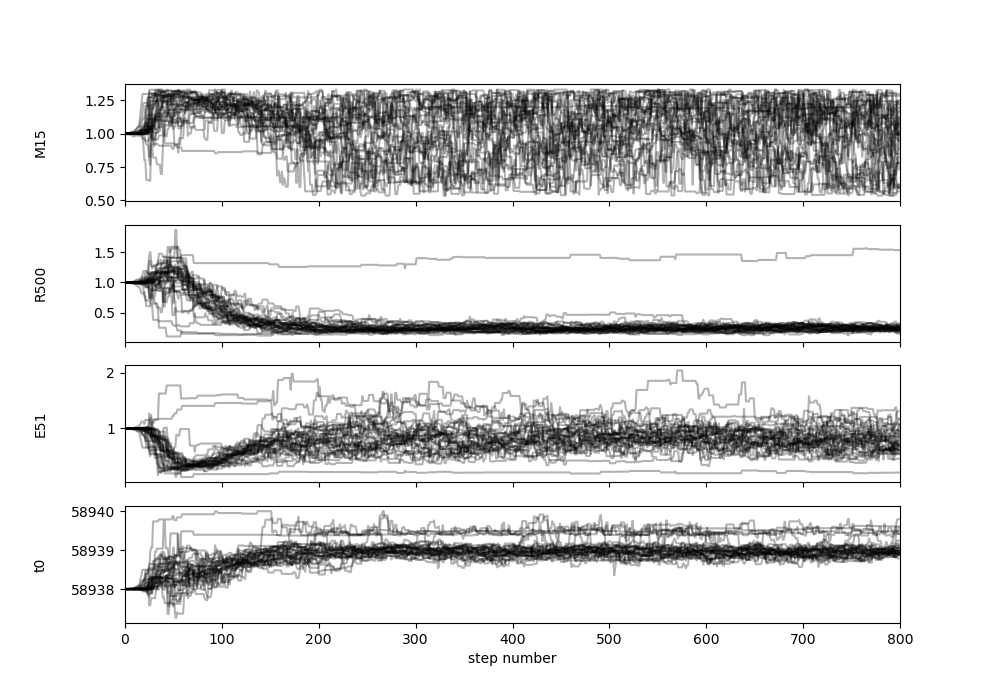

In [393]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["M15", "R500", "E51","t0"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [394]:
flat_samples = sampler.get_chain(discard=300, thin=15, flat=True)
print(flat_samples.shape)

(1056, 4)


<IPython.core.display.Javascript object>


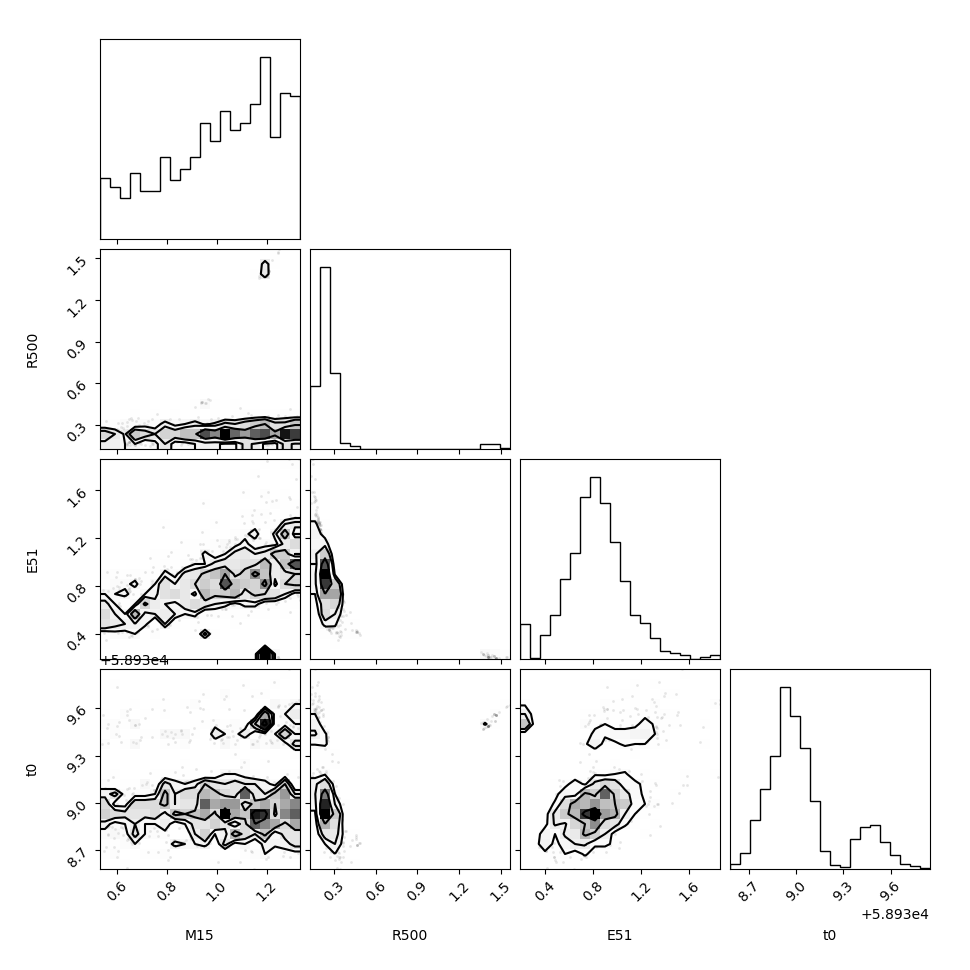

In [395]:
import corner

fig = corner.corner(
    flat_samples, labels=labels
);
plt.savefig('nakar_corner.png')

In [396]:
mass = np.percentile(flat_samples[:, 0],50)
rad = np.percentile(flat_samples[:, 1],50)
expl = np.percentile(flat_samples[:, 2],50)
t0 = np.percentile(flat_samples[:, 3],50)

In [397]:
from copy import deepcopy

In [398]:
def Nakar_lc(var,data,dist,av=0,Rv=3.22,shock=True):
    M15 = var[0]
    R500 = var[1]
    E51 = var[2]
    t0 = var[3]
    res = {}
    keys = list(data.keys())
    for key in keys:
        time = deepcopy(data[key]['lc']['time']) - t0
        ob_mag = data[key]['lc']['mag']
        ob_magerr = data[key]['lc']['mag_err']
        specs = Nakar_model(M15,R500,E51,time,dist,shock=shock)
        
        mod_mag = Spec_mags(specs,data[key]['pb'],av=av,Rv=Rv)
        mod_mag = mod_mag[list(mod_mag.keys())[0]]    
        res[key] = {}
        res[key]['time'] = data[key]['lc']['time']
        res[key]['mag'] = mod_mag
    return res

<IPython.core.display.Javascript object>


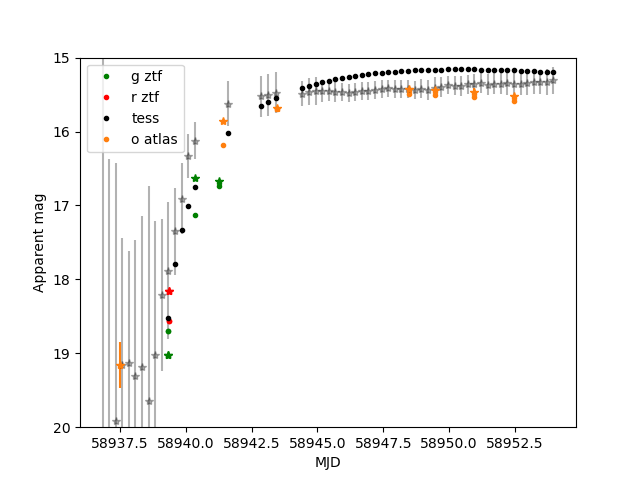

In [399]:
inds = np.random.randint(len(flat_samples), size=100)

eh = Nakar_lc([mass,rad,expl,t0],data,17.3e6,av=av,Rv=Rv,shock=False)

plt.figure()
plt.plot(eh['ztf_g']['time'],eh['ztf_g']['mag'],'g.',label='g ztf')
plt.plot(data['ztf_g']['lc']['time'],data['ztf_g']['lc']['mag'],'g*',alpha=1)

plt.plot(eh['ztf_r']['time'],eh['ztf_r']['mag'],'r.',label='r ztf')
plt.plot(data['ztf_r']['lc']['time'],data['ztf_r']['lc']['mag'],'r*',alpha=1)

plt.plot(eh['tess']['time'],eh['tess']['mag'],'k.',label='tess')
plt.errorbar(data['tess']['lc']['time'],data['tess']['lc']['mag'],
             yerr=data['tess']['lc']['mag_err'],fmt='*k',alpha=0.3)


plt.plot(eh['atlas_o']['time'],eh['atlas_o']['mag'],'C1.',label='o atlas')
plt.errorbar(data['atlas_o']['lc']['time'],data['atlas_o']['lc']['mag'],yerr=data['atlas_o']['lc']['mag_err'],fmt='*C1',alpha=1)
plt.gca().invert_yaxis()
plt.ylim(20,15)
plt.ylabel('Apparent mag')
plt.xlabel('MJD')
plt.legend()
plt.savefig('nakar_fit.png')

<IPython.core.display.Javascript object>


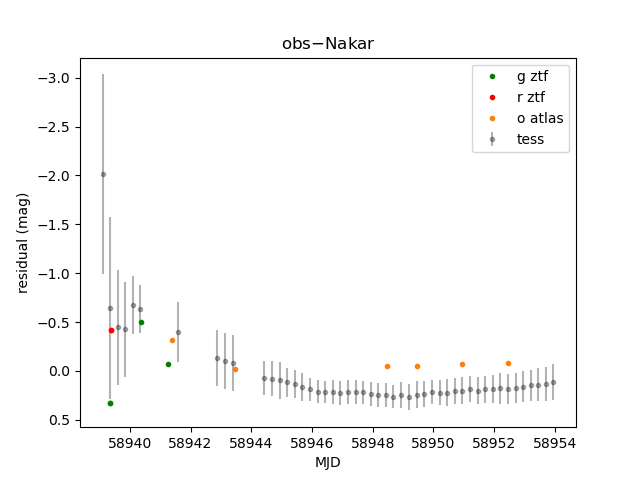

In [400]:
plt.figure()
plt.plot(eh['ztf_g']['time'],data['ztf_g']['lc']['mag']-eh['ztf_g']['mag'],'g.',label='g ztf')

plt.plot(eh['ztf_r']['time'],data['ztf_r']['lc']['mag']-eh['ztf_r']['mag'],'r.',label='r ztf')

plt.errorbar(data['tess']['lc']['time'],data['tess']['lc']['mag']-eh['tess']['mag'],
             yerr=data['tess']['lc']['mag_err'],fmt='.k',alpha=0.3,label='tess')


plt.plot(eh['atlas_o']['time'],data['atlas_o']['lc']['mag']-eh['atlas_o']['mag'],'C1.',label='o atlas')
plt.gca().invert_yaxis()
#plt.ylim(20,15)
plt.ylabel('residual (mag)')
plt.xlabel('MJD')
plt.title('obs$-$Nakar')
plt.legend()
plt.savefig('nakar_residuals.png')

In [401]:
from IPython.display import display, Math


for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [436]:
500*(.238-0.045)

96.5

In [335]:
rsnec = np.arange(-10000,10000)

<IPython.core.display.Javascript object>


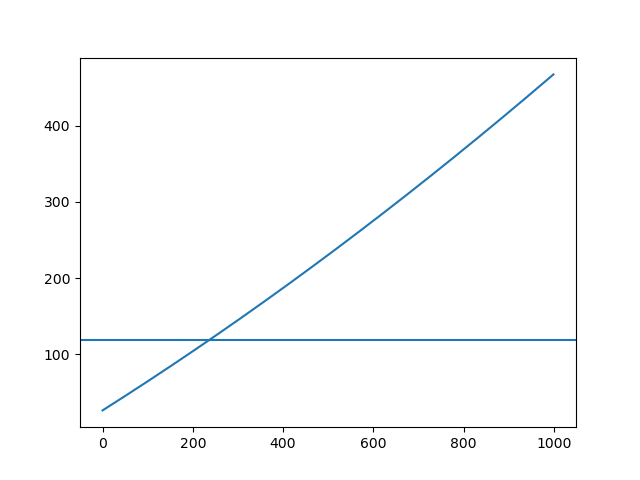

In [404]:
plt.figure()
plt.plot(rsnec,26.3+0.375*rsnec+6.64e-5*rsnec**2)
plt.axhline(rad*500)

In [437]:
rsnec = np.arange(0,1000)
rad_relation = 26.3+0.375*rsnec+6.64e-5*rsnec**2
rsnec[np.argmin(abs(rad_relation - 96))]

180

In [438]:
180-237

-57

In [439]:
esnec = np.arange(0,5,0.001)
en_relation = 0.224+2.47*esnec+0.655*esnec**2
esnec[np.argmin(abs(en_relation - expl))]

0.227

<IPython.core.display.Javascript object>


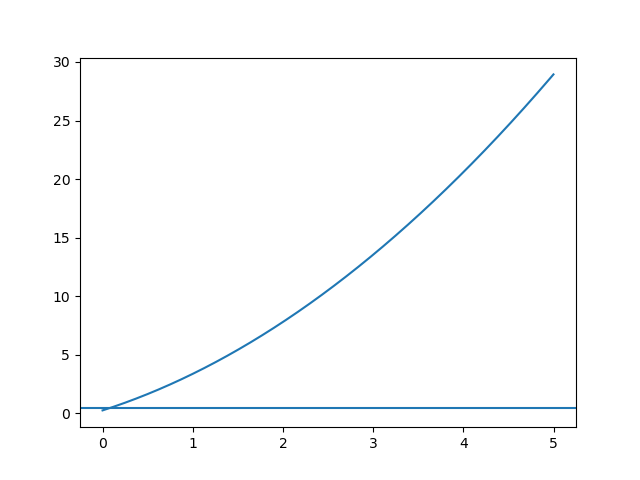

In [352]:
plt.figure()
plt.plot(esnec,en_relation)
plt.axhline(expl)

In [353]:
expl

0.42583246938327934

In [427]:
av = np.array([tim,-2.5*np.log10(flu) + 20.81,-2.5*np.log10(flu) + 20.81 -1,mag_err]).T

In [429]:
np.savetxt('20fqv_tess6hr.txt',av)